In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("netflix_titles.csv")

In [39]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## fill the null values in the important columns

In [41]:
df["country"].value_counts()

United States                                       2818
India                                                972
United Kingdom                                       419
Japan                                                245
South Korea                                          199
                                                    ... 
Argentina, France, United States, Germany, Qatar       1
Germany, United States, Canada                         1
France, South Korea, Japan, United States              1
France, Germany                                        1
Uruguay, Germany                                       1
Name: country, Length: 748, dtype: int64

In [42]:
df["country"]= df["country"].fillna("United States")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## drop the non-important columns in my analysis

In [45]:
df.drop(["show_id","listed_in","duration"], axis=1, inplace=True)

In [46]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,In a city of coaching centers known to train I...


## the  deplicated values

In [47]:
df[df.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,description


## show the count of each type

In [48]:
df.groupby("type").type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

C:\Users\moh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


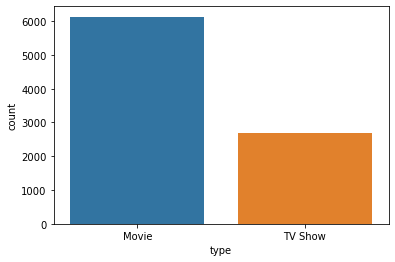

In [49]:
sns.countplot(df['type']);

## show all the movies that were released in 2000

In [50]:
df[(df["type"] == "Movie") & ( df['release_year']==2000) ].head(20)

,type,title,director,cast,country,date_added,release_year,rating,description
180,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",United States,"September 1, 2021",2000,PG-13,"After getting engaged, Sherman Klump prepares ..."
350,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,A retired engineer agrees to help NASA prevent...
359,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,"August 1, 2021",2000,R,"Comedians Steve Harvey, Cedric the Entertainer..."
566,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000,PG-13,A tight-knit trio of specially trained agents ...
593,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,"July 1, 2021",2000,PG,"When a snow day shuts down the whole town, the..."
779,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,"June 2, 2021",2000,PG-13,"In the year 3000, an alien race known as the P..."
952,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000,R,An unhappily married dentist becomes mixed up ...
3472,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States","October 1, 2019",2000,G,The Rugrats take to the big screen and visit P...
4545,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,"October 2, 2018",2000,TV-MA,Discover how six seemingly ordinary but suprem...
4723,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000,TV-14,Fiza's brother disappears during Mumbai's horr...


## which were the top 5 years in number of titles released..

In [51]:
top_5_years = df.groupby("release_year").count().sort_values('title', ascending=False).head(6)
top_5_years.reset_index(inplace =True)
top_5_years

,release_year,type,title,director,cast,country,date_added,rating,description
0,2018,1147,1147,760,1026,1147,1146,1147,1147
1,2017,1032,1032,773,912,1032,1032,1031,1032
2,2019,1030,1030,629,917,1030,1030,1030,1030
3,2020,953,953,548,827,953,953,953,953
4,2016,902,902,653,804,902,901,902,902
5,2021,592,592,297,494,592,592,592,592


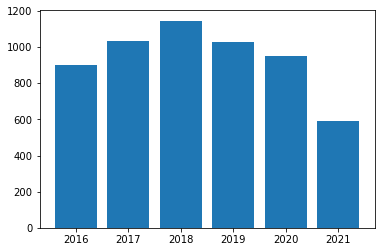

In [52]:
plt.bar(top_5_years.release_year ,top_5_years.title);

## show the titles of all the TV shows that were released in egypt

In [66]:
df[(df["country"] == "India") & (df["type"] == "TV Show")] ["title"].head(10)

4                        Kota Factory
39                       Chhota Bheem
50                      Dharmakshetra
66      Raja Rasoi Aur Anya Kahaniyan
69     Stories by Rabindranath Tagore
266              The Creative Indians
297                          Navarasa
876                      Alma Matters
911                  Sab Jholmaal Hai
918                    Lava Ka Dhaava
Name: title, dtype: string

## show top 10 directors who gave the highest number of TV shows and Movies to Netflix

In [54]:
df["director"].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64

## which country has the most number of titles produced..

In [55]:
most_titles_produced = df.groupby("country").count().sort_values('title', ascending=False).head(6)
most_titles_produced.reset_index(inplace = True)
most_titles_produced

,country,type,title,director,cast,date_added,release_year,rating,description
0,United States,3649,3649,2470,3165,3642,3649,3648,3649
1,India,972,972,890,940,972,972,972,972
2,United Kingdom,419,419,212,351,418,419,419,419
3,Japan,245,245,85,240,244,245,244,245
4,South Korea,199,199,49,196,199,199,199,199
5,Canada,181,181,119,162,181,181,181,181


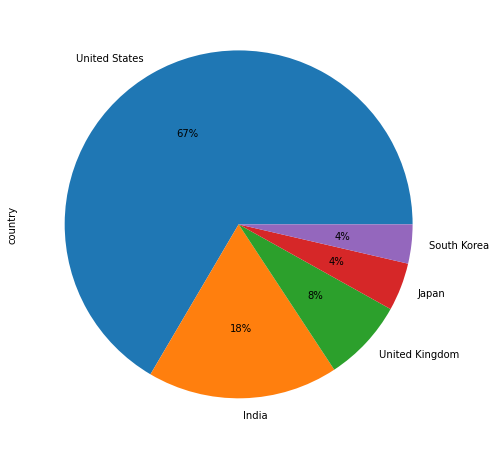

In [67]:
x = df["country"].value_counts().head(5)
x.plot(kind = 'pie' ,autopct='%0.f%%' ,figsize=(8,8));


## show all works that Clint Eastwood participated in

In [57]:
df = df.convert_dtypes()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   string
 1   title         8807 non-null   string
 2   director      6173 non-null   string
 3   cast          7982 non-null   string
 4   country       8807 non-null   string
 5   date_added    8797 non-null   string
 6   release_year  8807 non-null   Int64 
 7   rating        8803 non-null   string
 8   description   8807 non-null   string
dtypes: Int64(1), string(8)
memory usage: 628.0 KB


In [59]:
df[df['cast'].str.contains("Clint Eastwood")]

,type,title,director,cast,country,date_added,release_year,rating,description
183,Movie,In the Line of Fire,Wolfgang Petersen,"Clint Eastwood, John Malkovich, Rene Russo, Dy...",United States,"August 31, 2021",1993,R,A twisted yet ingenious killer torments a vete...
350,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,A retired engineer agrees to help NASA prevent...
799,Movie,Million Dollar Baby,Clint Eastwood,"Clint Eastwood, Hilary Swank, Morgan Freeman, ...",United States,"June 2, 2021",2004,PG-13,When a cantankerous trainer mentors a persiste...
819,Movie,The Outlaw Josey Wales,Clint Eastwood,"Clint Eastwood, Sondra Locke, Chief Dan George...",United States,"June 2, 2021",1976,PG,"In this gritty Oscar-nominated Western, an ex-..."
6888,Movie,Gran Torino,Clint Eastwood,"Clint Eastwood, Bee Vang, Ahney Her, Christoph...","Germany, United States","October 1, 2020",2008,R,A newly widowed Korean War veteran faces his r...


## plot the values of rating column

In [60]:
df["rating"].nunique()

17

In [61]:
order_r = df['rating'].value_counts().index[:14]

C:\Users\moh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


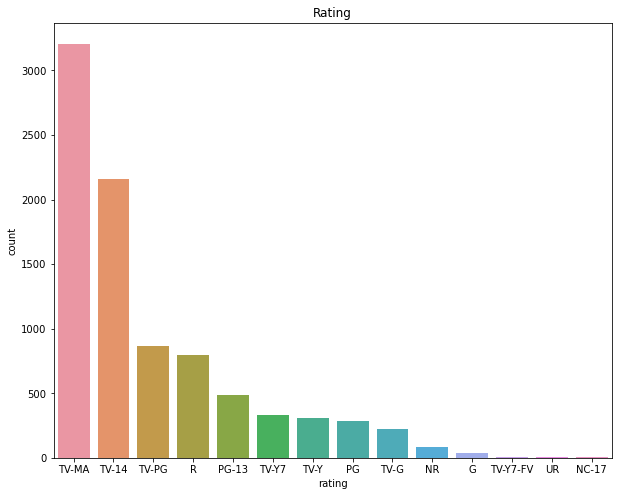

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(df["rating"] , order=order_r)
plt.title("Rating");

## relation between Type and Rating of Movies and Shows

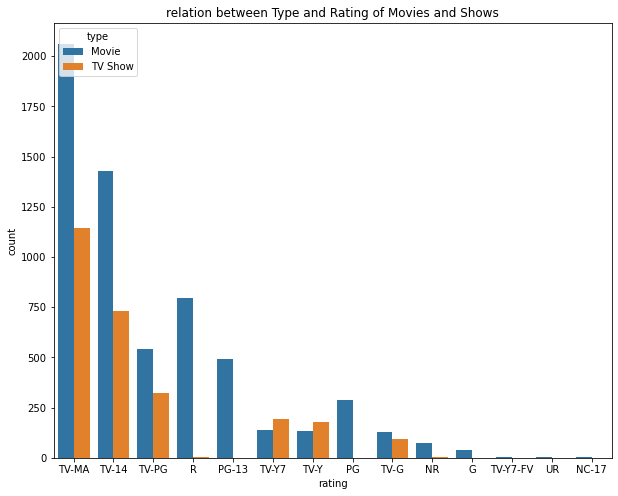

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(x= "rating" , hue="type" , data=df ,order=order_r)
plt.title("relation between Type and Rating of Movies and Shows");

## top 5 years have movies

In [83]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] =df["date_added"].dt.year

In [84]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,description,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",2021.0
1,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2021.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,To protect his family from a powerful drug lor...,2021.0
3,TV Show,Jailbirds New Orleans,<NA>,<NA>,United States,2021-09-24,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",2021.0
4,TV Show,Kota Factory,<NA>,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,In a city of coaching centers known to train I...,2021.0


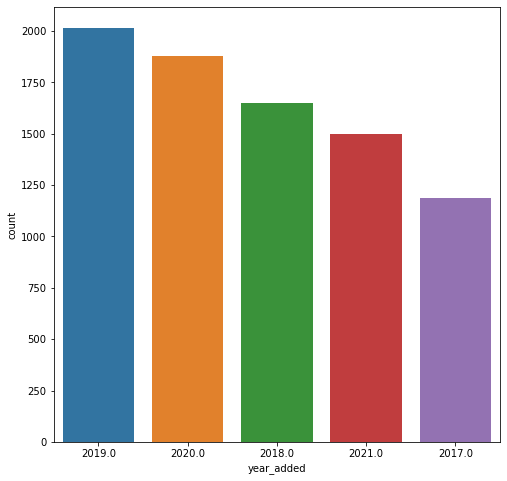

In [87]:
plt.figure(figsize=(8,8))
sns.countplot(x = df["year_added"] , order=df['year_added'].value_counts().index[:5]);